In [235]:
# Load convolve_im_freq from freq_1.ipynb 
from IPython.display import clear_output
%run -n freq_1.ipynb 
clear_output(wait=False) 

import os
import numpy as np
import utils
import matplotlib.pyplot as plt 

In [236]:
def convolve_im_freq(im: np.array,
                fft_kernel: np.array,
                verbose=True):
    """ Convolves the image (im) with the frequency kernel (fft_kernel),
        and returns the resulting image.

        "verbose" can be used for turning on/off visualization
        convolution

    Args:
        im: np.array of shape [H, W]
        fft_kernel: np.array of shape [H, W] 
        verbose: bool
    Returns:
        im: np.array of shape [H, W]
    """
    ### START YOUR CODE HERE ### (You can change anything inside this block)
    im_fft = np.fft.fft2(im)
    filtered_fft = im_fft * fft_kernel #element wise multiplication

    fft_to_im = lambda fft: np.log(np.abs(np.fft.fftshift(fft))+1)

    inversed_amplitude_filtered = np.real(np.fft.ifft2(filtered_fft))


    conv_result = inversed_amplitude_filtered
  
    
    if verbose:
        # Use plt.subplot to place two or more images beside eachother
        plt.figure(figsize=(20, 4))
        # plt.subplot(num_rows, num_cols, position (1-indexed))
        plt.subplot(1, 5, 1)
        plt.imshow(im, cmap="gray")
        plt.title("Original Image")

        plt.subplot(1, 5, 2) 
        # Visualize FFT
        plt.title("FFT Image")
        plt.imshow(fft_to_im(im_fft), cmap="gray")


        plt.subplot(1, 5, 3)
        # Visualize FFT kernel
        plt.title("FFT Kernel")
        plt.imshow(fft_to_im(fft_kernel), cmap="gray")
        plt.subplot(1, 5, 4)
        # Visualize filtered FFT image
        plt.title("Filtered FFT Image")
        plt.imshow(fft_to_im(filtered_fft), cmap="gray")
        plt.subplot(1, 5, 5) 
        # Visualize filtered spatial image
        plt.imshow(conv_result, cmap="gray")
        plt.title("Filtered Spatial Image")
        
        

    ### END YOUR CODE HERE ###
    return conv_result

In [237]:
import numpy as np

def create_kernel(im):
    """
    Creates a notch filter kernel in the frequency domain to remove vertical stripes.

    Args:
        im: np.array of shape [H, W]
    Returns:
        kernel: np.array of shape [H, W]
    """
    # Initialize the kernel with ones (allowing all frequencies to pass)
    kernel = np.ones_like(im, dtype=np.float32)
    h, w = im.shape

    # Shift the kernel to have the DC component at the center
    kernel = np.fft.fftshift(kernel)

    # Define the center of the frequency domain (DC component is now centered)
    center_row, center_col = h // 2, w // 2

    # Define the interval for the repeating spikes
    spacing = 15  # This is the horizontal spacing between the spikes; adjust based on observation of FFT image
    block_size = 2  # Adjust this size to block more or fewer frequencies around the spikes

    # Block specific high-frequency components (notch filter)
    # Blocking symmetric points around the center at regular intervals along the horizontal axis
    for offset in range(spacing, center_col, spacing):
        # Block positive and negative offsets from the center
        for i in range(-block_size, block_size + 1):
            for j in range(-block_size, block_size + 1):
                # Blocking on the right side from the center
                kernel[center_row + i, center_col + offset + j] = 0
                # Blocking on the left side from the center
                kernel[center_row + i, center_col - offset + j] = 0

    # Shift the kernel back to its original form
    kernel = np.fft.ifftshift(kernel)

    return kernel


Saving image to: image_processed\moon_filtered.png


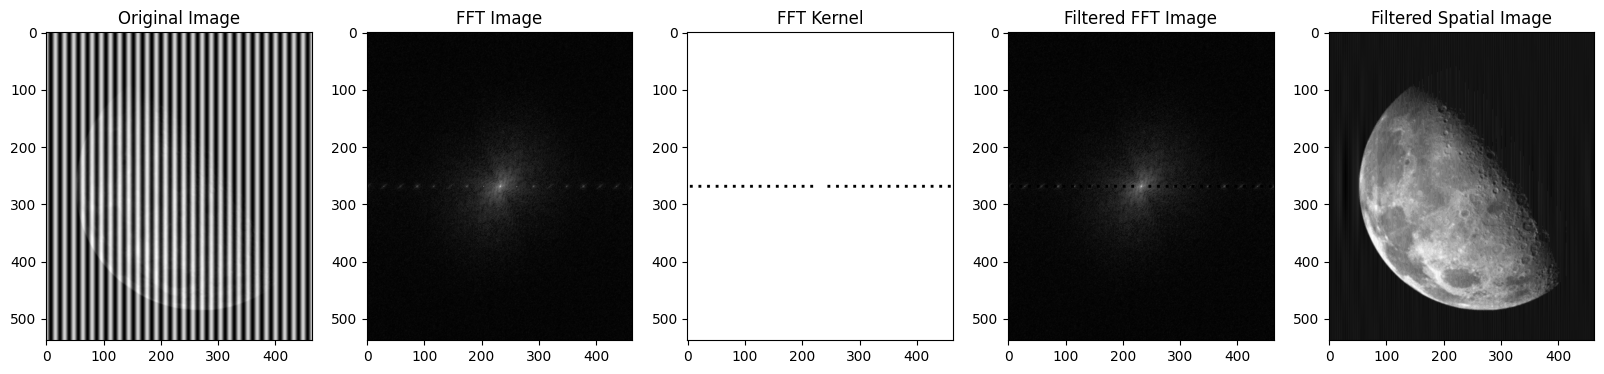

In [238]:
if __name__ == "__main__":
    # Changing this code should not be needed!
    
    impath = os.path.join("images", "noisy_moon.png")
    im = utils.read_im(impath)

    kernel = create_kernel(im)        
    # Note that this function is from your own implementation of convolve_im_freq from freq_1.ipynb
    im_filtered = convolve_im_freq(im, kernel, True) 
    
    utils.save_im("moon_filtered.png", utils.normalize(im_filtered))